# MLOps homework assignment 2 - Diabetes

First, lets start out by installing and/or importing the necessary libraries.

In [322]:
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

try:
    import sklearn
    print('sklearn already installed, only imported')
except:
    !pip install scikit-learn
    import sklearn
    print('sklearn was not installed, installed and imported')

try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported')

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
sklearn already installed, only imported
seaborn already installed, only imported


Now, let's load the diabetes dataset and check it out

In [75]:
diabetes_DF = pd.read_csv('diabetes.tsv', sep='\t').rename(columns={
    'AGE': 'age', 'SEX': 'sex', 'BMI': 'bmi', 
    'BP': 'bp', 'S1': 's1', 'S2': 's2', 'S3': 's3', 
    'S4': 's4', 'S5': 's5', 'S6': 's6', 'Y': 'progression'})

diabetes_DF.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
from sklearn.datasets import load_diabetes

#load the diabetes dataset
diabetes_data = load_diabetes()

diabetes_desc = diabetes_data.DESCR
print(diabetes_desc)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Find top 3 predictive features according to 3 different methods of measuring predictiveness

### Method #1: Feature importance

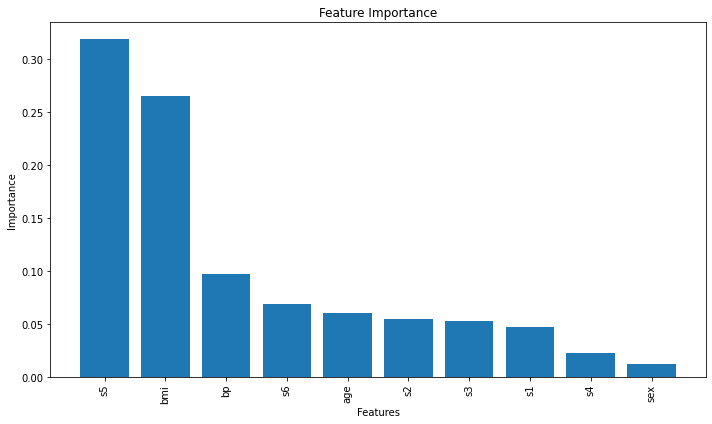

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

X, y = diabetes_DF.iloc[:, 0:10], diabetes_DF['progression']

model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Method #2: Correlation matrix

In [ ]:
correlation_matrix = diabetes_DF.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Method #3: Univariate feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X = diabetes_DF.iloc[:, 0:10]
y = diabetes_DF['progression']

selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

# Print selected features from univariate selection
print("Selected Features from Univariate Selection:")
print(selected_features)

### Method #4: Mutual Information Scores

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Print mutual information scores
print("Mutual Information Scores:")
print(mi_scores)

Now that we have tried various methods for determining the best features, let's take the top three from each one of them and then determine which three appear the most!

Method 1: s5, bmi, bp<br>
Method 2: bmi, s5, bp<br>
Method 3: bmi, s5, bp<br>
Method 4: bmi, s5, s6

From this, we can concluded that the top 3 features are: **bmi**, **s5** and **bp**

## Design 2 new features

Given the fact that the our top three features are bmi, s5 and bp, it would only be appropriate if the two 2 new features were related to these features.

For the 2 new features, I want to choose blood pressure category and bmi category. For the blood pressure category, I want to add 'Normal', 'Elevated', 'High' and 'Extremely High' categories. As for the bmi category, I want to add 'Underweight', 'Normal Weight', 'Overweight' and 'Obese' categories.

In [85]:
diabetes_DF['bp_category'] = pd.cut(diabetes_DF['bp'], bins=[0, 80, 90, 120, 1000],
                           labels=['Normal', 'Elevated', 'High', 'Extremely High'])


diabetes_DF['bmi_category'] = pd.cut(diabetes_DF['bmi'], bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

reorder_columns = ['age', 'sex', 'bp', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6', 'bp_category', 'bmi_category', 'progression']

diabetes_DF = diabetes_DF[reorder_columns]

In [86]:
diabetes_DF.head(5)

,age,sex,bp,bmi,s1,s2,s3,s4,s5,s6,bp_category,bmi_category,progression
0,59,2,101.0,32.1,157,93.2,38.0,4.0,4.8598,87,High,Obese,151
1,48,1,87.0,21.6,183,103.2,70.0,3.0,3.8918,69,Elevated,Normal Weight,75
2,72,2,93.0,30.5,156,93.6,41.0,4.0,4.6728,85,High,Obese,141
3,24,1,84.0,25.3,198,131.4,40.0,5.0,4.8903,89,Elevated,Overweight,206
4,50,1,101.0,23.0,192,125.4,52.0,4.0,4.2905,80,High,Normal Weight,135


## Pre-process necessary features

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [100]:
diabetes_DF.isnull().sum()

age             0
sex             0
bp              0
bmi             0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
bp_category     0
bmi_category    0
progression     0
dtype: int64

In [125]:
#numeric_features = ['bmi', 's5', 'bp']
numeric_features = ['s5']
numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

In [126]:
categorical_features = ['bp_category', 'bmi_category']
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore")), ("selector", SelectPercentile(chi2, percentile=50))])

In [127]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),("cat", categorical_transformer, categorical_features)])
#preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features)])
#preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features)])

## Predict how disease progresses 1 year from datapoint

In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])

In [324]:
#X = diabetes_DF[['bmi', 's5', 'bp']]
X = diabetes_DF[['bp_category', 'bmi_category', 's5']]
y = diabetes_DF['progression']

In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
import time

start_time = time.time()

pipeline.fit(X_train, y_train)

end_time = time.time()

total_time = end_time - start_time

print("Total time: {:.2f} seconds".format(total_time))

Total time: 0.01 seconds


In [327]:
data_point = X_test.iloc[0:1]
data_point

,bp_category,bmi_category,s5
287,Elevated,Overweight,4.9972


In [328]:
y_pred = pipeline.predict(data_point)
print(f'The predicted progression of the disease after 1 year of the datapoint is: {y_pred}')

The predicted progression of the disease after 1 year of the datapoint is: [179.3279604]


## Report score/accuracy in at least 2 different formats

In [318]:
y_pred = pipeline.predict(X_test)

### Mean sqaured error (MSE)

In [319]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  2869.4675953658934


### Mean absolute error (MAE)

In [320]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 43.63753046703108


### Pearson's correlation coefficient

In [321]:
from scipy.stats import pearsonr

corr, _ = pearsonr(y_test, y_pred)
print("Pearson's correlation coefficient:", corr)

Pearson's correlation coefficient: 0.6793270142614429


### R-Squared (R2 / determination coeffient) / Variance score

In [275]:
score = model.score(X_test, y_test)
print(f'The R-Squared score is: {score}')

The R-Squared score is: 0.45637440412431496
